## Figure 1 Jupyter Notebook

In [1]:
### Start by initalizing what we need
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import requests
from io import StringIO

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

In [2]:
input_path = 'C:\\Users\\fallest\\Google Drive\\Imperial Paper\\data\\'  ##change this to the path where the data is saved
#input_path = 'C:\\Users\\miste\\Google Drive\\Imperial Paper\\data\\'

Root_142 = pd.read_csv(input_path+'142_lifematrix_clean_feb1.txt')
Root_147 = pd.read_csv(input_path+'147_lifematrix_clean_feb1.txt')
Root_182 = pd.read_csv(input_path+'182_lifematrix_clean_feb1.txt')
Root_192 = pd.read_csv(input_path+'192_lifematrix_clean_feb1.txt')
Root_200 = pd.read_csv(input_path+'200_lifematrix_clean_feb1.txt')
Root_208 = pd.read_csv(input_path+'208_lifematrix_clean_feb1.txt')
Root_218 = pd.read_csv(input_path+'218_lifematrix_clean_feb1.txt')
Root_219 = pd.read_csv(input_path+'219_lifematrix_clean_feb1.txt')

In [3]:
# Added index for each cut root
Root_182.columns=np.arange(1,len(Root_182.loc[0])+1)
Root_192.columns=np.arange(1,len(Root_192.loc[0])+1)
Root_200.columns=np.arange(1,len(Root_200.loc[0])+1)
Root_208.columns=np.arange(1,len(Root_208.loc[0])+1)

# Added index for each uncut root
Root_142.columns=np.arange(1,len(Root_142.loc[0])+1)
Root_147.columns=np.arange(1,len(Root_147.loc[0])+1)
Root_218.columns=np.arange(1,len(Root_218.loc[0])+1)
Root_219.columns=np.arange(1,len(Root_219.loc[0])+1)

In [4]:
def time_formatter(root_data):
    root_data_frame = root_data.sum(axis=1, skipna=False).fillna(method='pad').to_frame()
    root_data_frame = root_data_frame.rename(columns = {0:'Events'})
    root_data_frame['Time'] = np.arange(0, len(root_data_frame))*0.25
    return root_data_frame

In [5]:
# Generate timeseries of event for each cut root from life-matrix
Timeseries_root_182=time_formatter(Root_182)
Timeseries_root_192=time_formatter(Root_192)
Timeseries_root_200=time_formatter(Root_200)
Timeseries_root_208=time_formatter(Root_208)

# Generate timeseries of event for each uncut root from life-matrix
Timeseries_root_142=time_formatter(Root_142)
Timeseries_root_147=time_formatter(Root_147)
Timeseries_root_218=time_formatter(Root_218)
Timeseries_root_219=time_formatter(Root_219)

In [6]:
# Generate timeseries of event for each cut root from life-matrix
events_182 = Timeseries_root_182
events_192 = Timeseries_root_192
events_200 = Timeseries_root_200
events_208 = Timeseries_root_208

events_cut = pd.concat([events_182 , events_192, events_200,events_208])

# Generate timeseries of event for each uncut root from life-matrix
events_142 = Timeseries_root_142
events_147 = Timeseries_root_147
events_218 = Timeseries_root_218
events_219 = Timeseries_root_219

#bursts_uncut= np.hstack((bursts_142,bursts_147,bursts_218,bursts_219))
events_uncut= pd.concat([events_142,events_147,events_218,events_219])
#https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html
events_cut = events_cut.fillna(method='pad')  #fill the NaN
events_uncut = events_uncut.fillna(method='pad') #fill the NaN

In [7]:
#Get some statistics
events_cut.describe()

,Events,Time
count,1703.000000,1703.000000
mean,5.840282,54.196712
std,5.160216,32.570938
min,0.000000,0.000000
25%,3.000000,26.500000
50%,4.000000,53.000000
75%,8.000000,79.750000
max,95.000000,122.000000


In [8]:
events_uncut.describe()

,Events,Time
count,1993.000000,1993.000000
mean,5.794280,65.046538
std,5.793712,41.077505
min,0.000000,0.000000
25%,3.000000,31.000000
50%,5.000000,62.250000
75%,7.000000,93.250000
max,83.000000,168.500000


In [9]:
events_142.head()

,Events,Time
0,20.0,0.00
1,22.0,0.25
2,20.0,0.50
3,14.0,0.75
4,12.0,1.00


### What we want to plot is the 8 lines from cut and uncut on one axis, maybe two, to show the number of events cut and uncut


In [10]:
print('These are the uncut roots')
print('There are:', events_142.count()[0], 'time points in run 142')
print('There are:', events_147.count()[0], 'time points in run 147')
print('There are:', events_218.count()[0], 'time points in run 218')
print('There are:', events_219.count()[0], 'time points in run 219')

These are the uncut roots
There are: 467 time points in run 142
There are: 675 time points in run 147
There are: 466 time points in run 218
There are: 385 time points in run 219


In [11]:
print('These are the cut roots')
print('There are:', events_182.count()[0], 'time points in run 182')
print('There are:', events_192.count()[0], 'time points in run 192')
print('There are:', events_200.count()[0], 'time points in run 200')
print('There are:', events_208.count()[0], 'time points in run 208')

These are the cut roots
There are: 489 time points in run 182
There are: 485 time points in run 192
There are: 362 time points in run 200
There are: 367 time points in run 208


In [12]:
## Add the function from figure 2 where we figure out the mean and standard deviations,, to show where the bursts are:
# This is from April figure 4
##Compute mean for cut and uncut
uncut_mean_events = events_uncut['Events'].mean()
cut_mean_events = events_cut['Events'].mean()
uncut_std = events_cut['Events'].std()
cut_std = events_uncut['Events'].std()
print('There are on average ',uncut_mean_events, ' events per frame in the uncut root and ', cut_mean_events, 'events per frame in cut roots')
print('The standard deviation of events in the uncut root is: ',uncut_std)
print('The standard deviation of events in the cut root is: ',cut_std)

There are on average  5.794279979929754  events per frame in the uncut root and  5.840281855549031 events per frame in cut roots
The standard deviation of events in the uncut root is:  5.160215511713273
The standard deviation of events in the cut root is:  5.79371174455562


# Define a burst.  
## I'm going to use 1 standard deviation above the mean is a burst.
(this is block 6 of the code for figure 4)

In [13]:
#Find the burst condition for cut and uncut.  The value epsilon is the mean+std deviation

epsilon_uncut = uncut_mean_events + uncut_std
epsilon_cut = cut_mean_events+cut_std
print('Epsilon for uncut is: ', epsilon_uncut)
print('Epsilon for cut is:', epsilon_cut)

Epsilon for uncut is:  10.954495491643026
Epsilon for cut is: 11.63399360010465


In [14]:
epsilon_uncut = uncut_mean_events + uncut_std
epsilon_cut = cut_mean_events+cut_std

epsilon_uncut = round(epsilon_uncut)
epsilon_cut = round(epsilon_cut)

print('Epsilon for uncut is: ', epsilon_uncut)
print('Epsilon for cut is:', epsilon_cut)


#use these in the function burst_finder as the epislon for 
#either uncut or cugt

Epsilon for uncut is:  11
Epsilon for cut is: 12


C:\Users\fallest\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\fallest\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\fallest\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or 

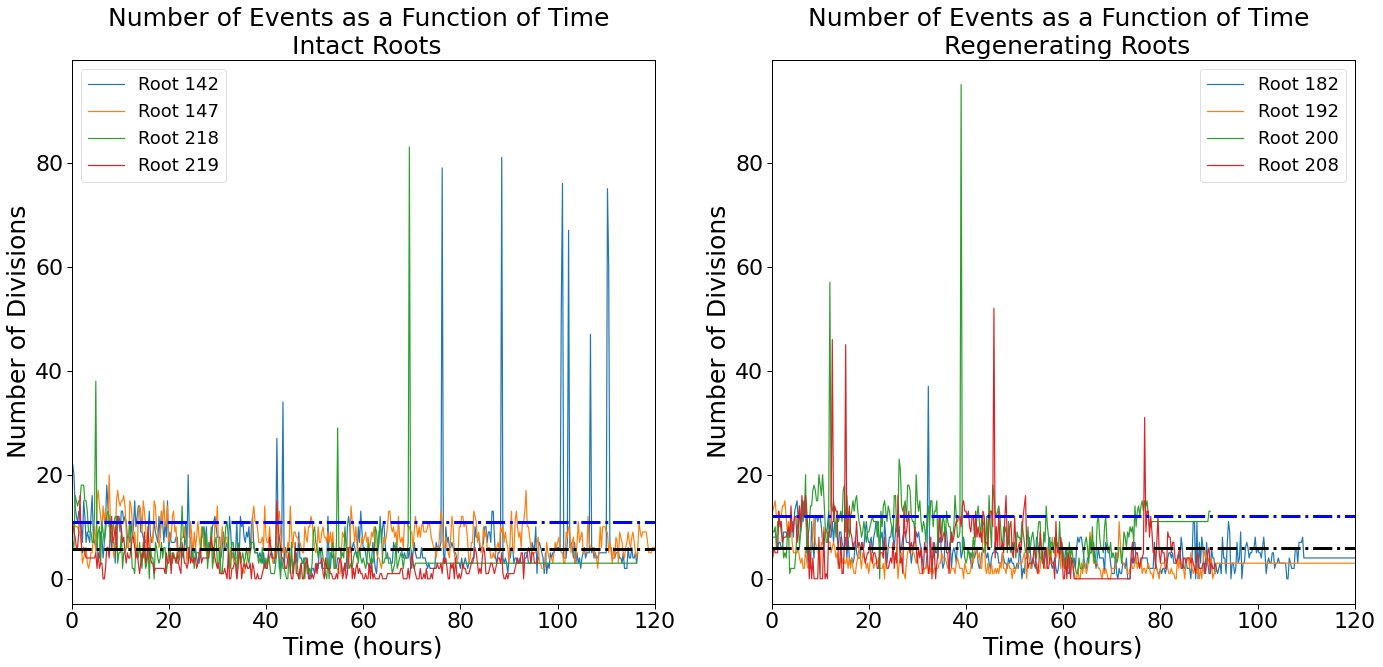

In [15]:

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 35}

matplotlib.rc('font', **font)


fig = plt.figure(figsize=(23, 10))

sns.set_context("paper", font_scale=2.5)
xmax = 120

#figure 1
ax_sns1 = fig.add_subplot(121)
ax_sns1 = sns.lineplot(events_142.Time, events_142.Events)

sns.lineplot(events_147.Time, events_147.Events)
sns.lineplot(events_218.Time, events_218.Events)
sns.lineplot(events_219.Time, events_219.Events)
#ax_sns1.set(xlabel = 'Time (hours)', ylabel='Number of Divisions', title='Number of Events as a Function of Time, Uncut', xlim=(0,170)) #set the labels
ax_sns1.set(xlim=(0,xmax))
ax_sns1.set_title('Number of Events as a Function of Time \n Intact Roots', size=25)
ax_sns1.set_xlabel('Time (hours)', fontsize=25)
ax_sns1.set_ylabel('Number of Divisions', fontsize=25)
ax_sns1.legend(labels = ['Root 142', 'Root 147', 'Root 218', 'Root 219'], fontsize=18) #set the legend



#plt.axvline(24, linewidth = 3, color = 'gray', linestyle = 'dashed') #put line at 24 hours
#plt.axvline(72, linewidth = 3, color = 'grey', linestyle = 'dashed') #put line at 72 hours

#plot the mean and standard devation
plt.axhline(y=uncut_mean_events, color='k', linestyle='-.', linewidth='3')
plt.axhline(y=epsilon_uncut, color='b', linestyle='-.', linewidth='3')
#######
#######






#figure 2
ax_sns2 = fig.add_subplot(122, sharey=ax_sns1)
ax_sns2 = sns.lineplot(events_182.Time, events_182.Events)
sns.lineplot(events_192.Time, events_192.Events)
sns.lineplot(events_200.Time, events_200.Events)
sns.lineplot(events_208.Time, events_208.Events)
ax_sns2.set(xlim=(0,xmax)) #set the labels
ax_sns2.set_title('Number of Events as a Function of Time \n Regenerating Roots', size=25)
ax_sns2.set_xlabel('Time (hours)', fontsize=25)
ax_sns2.set_ylabel('Number of Divisions', fontsize=25)
ax_sns2.legend(labels = ['Root 182', 'Root 192', 'Root 200', 'Root 208'], fontsize=18) #set the legend
#plt.axvline(24, linewidth = 3, color = 'grey', linestyle = 'dashed') #put line at 24 hours
#plt.axvline(72, linewidth = 3, color = 'grey', linestyle = 'dashed') #put line at 72 hours


#plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
#plt.rc('ytick', labelsize=20)    # fontsize of the tick labels


#plot the mean and standard devation
plt.axhline(y=cut_mean_events, color='k', linestyle='-.', linewidth='3')
plt.axhline(y=epsilon_cut, color='b', linestyle='-.', linewidth='3')

fig.savefig('figure_1_Feb_2022.png', facecolor='w', edgecolor='w')
fig.savefig('figure_1_Feb_2022.pdf', facecolor='w', edgecolor='w')